In [2]:
def wikidata_get():
    import requests
    
    url = 'https://query.wikidata.org/sparql'
    query = """
    SELECT DISTINCT ?river ?riverLabel ?destLabel ?river_length WHERE {
  ?river wdt:P17 wd:Q865;
    wdt:P31 wd:Q4022.
    OPTIONAL {?river wdt:P403 ?dest.}
    OPTIONAL {?river wdt:P2043 ?river_length.}
  
  SERVICE wikibase:label { bd:serviceParam wikibase:language "zh". }
}
ORDER BY DESC(?length)
    """
    r = requests.get(url, params = {'format': 'json', 'query': query})
    data = r.json()
    print(data)

    import pandas as pd
    from collections import OrderedDict
    
    rivers = []
    for item in data['results']['bindings']:
        #print(item)
        rivers.append(OrderedDict({
            'river': item['river']['value'],
            'riverLabel': item['riverLabel']['value'],
            'destLabel': item['destLabel']['value']
                if 'destLabel' in item else None,
            'river_length': item['river_length']['value']
                if 'river_length' in item else None
                }))
    
    df = pd.DataFrame(rivers)
    df.set_index('riverLabel', inplace=True)
    df = df.astype({'river_length': float})
    df.sort_values(by=['river_length'], inplace=True,ascending=False)
    print(df)

    %matplotlib notebook
    import matplotlib.pyplot as plt
    plt.style.use('ggplot')  
    plt.figure(figsize=(16, 12))

    label = 'river_length'
    df_plot = df[label].sort_values().dropna()    
    df_plot.plot(kind='barh', color='C0', ax=plt.gca());
    plt.ylabel('')
    plt.xticks(rotation=30)
    plt.title(label.capitalize())
    plt.yticks(fontname = 'SimSun',size=8)
    plt.show()
    

{'head': {'vars': ['river', 'riverLabel', 'destLabel', 'river_length']}, 'results': {'bindings': [{'river': {'type': 'uri', 'value': 'http://www.wikidata.org/entity/Q10934954'}, 'riverLabel': {'xml:lang': 'zh', 'type': 'literal', 'value': '大富溪'}, 'destLabel': {'xml:lang': 'zh', 'type': 'literal', 'value': '太平洋'}}, {'river': {'type': 'uri', 'value': 'http://www.wikidata.org/entity/Q10935069'}, 'riverLabel': {'xml:lang': 'zh', 'type': 'literal', 'value': '大屯溪'}, 'destLabel': {'xml:lang': 'zh', 'type': 'literal', 'value': '台灣海峽'}}, {'river': {'type': 'uri', 'value': 'http://www.wikidata.org/entity/Q10935212'}, 'riverLabel': {'xml:lang': 'zh', 'type': 'literal', 'value': '大崙溪'}}, {'river': {'type': 'uri', 'value': 'http://www.wikidata.org/entity/Q10935439'}, 'riverLabel': {'xml:lang': 'zh', 'type': 'literal', 'value': '大德溪'}, 'destLabel': {'xml:lang': 'zh', 'type': 'literal', 'value': '太平洋'}}, {'river': {'type': 'uri', 'value': 'http://www.wikidata.org/entity/Q10936117'}, 'riverLabel': {'x

                                               river destLabel  river_length
riverLabel                                                                  
濁水溪           http://www.wikidata.org/entity/Q708374      台灣海峽        186.00
高屏溪            http://www.wikidata.org/entity/Q57256      台灣海峽        171.00
淡水河          http://www.wikidata.org/entity/Q2420747      台灣海峽        158.70
大甲溪           http://www.wikidata.org/entity/Q714246      台灣海峽        142.00
曾文溪           http://www.wikidata.org/entity/Q697324      台灣海峽        138.50
大漢溪           http://www.wikidata.org/entity/Q199374       淡水河        135.00
烏溪           http://www.wikidata.org/entity/Q5208125      台灣海峽        119.10
旗山溪            http://www.wikidata.org/entity/Q57377       高屏溪        118.00
基隆河           http://www.wikidata.org/entity/Q708976       淡水河         96.00
大安溪           http://www.wikidata.org/entity/Q278671      台灣海峽         95.76
卑南溪           http://www.wikidata.org/entity/Q699259       太平洋         84.00

<IPython.core.display.Javascript object>


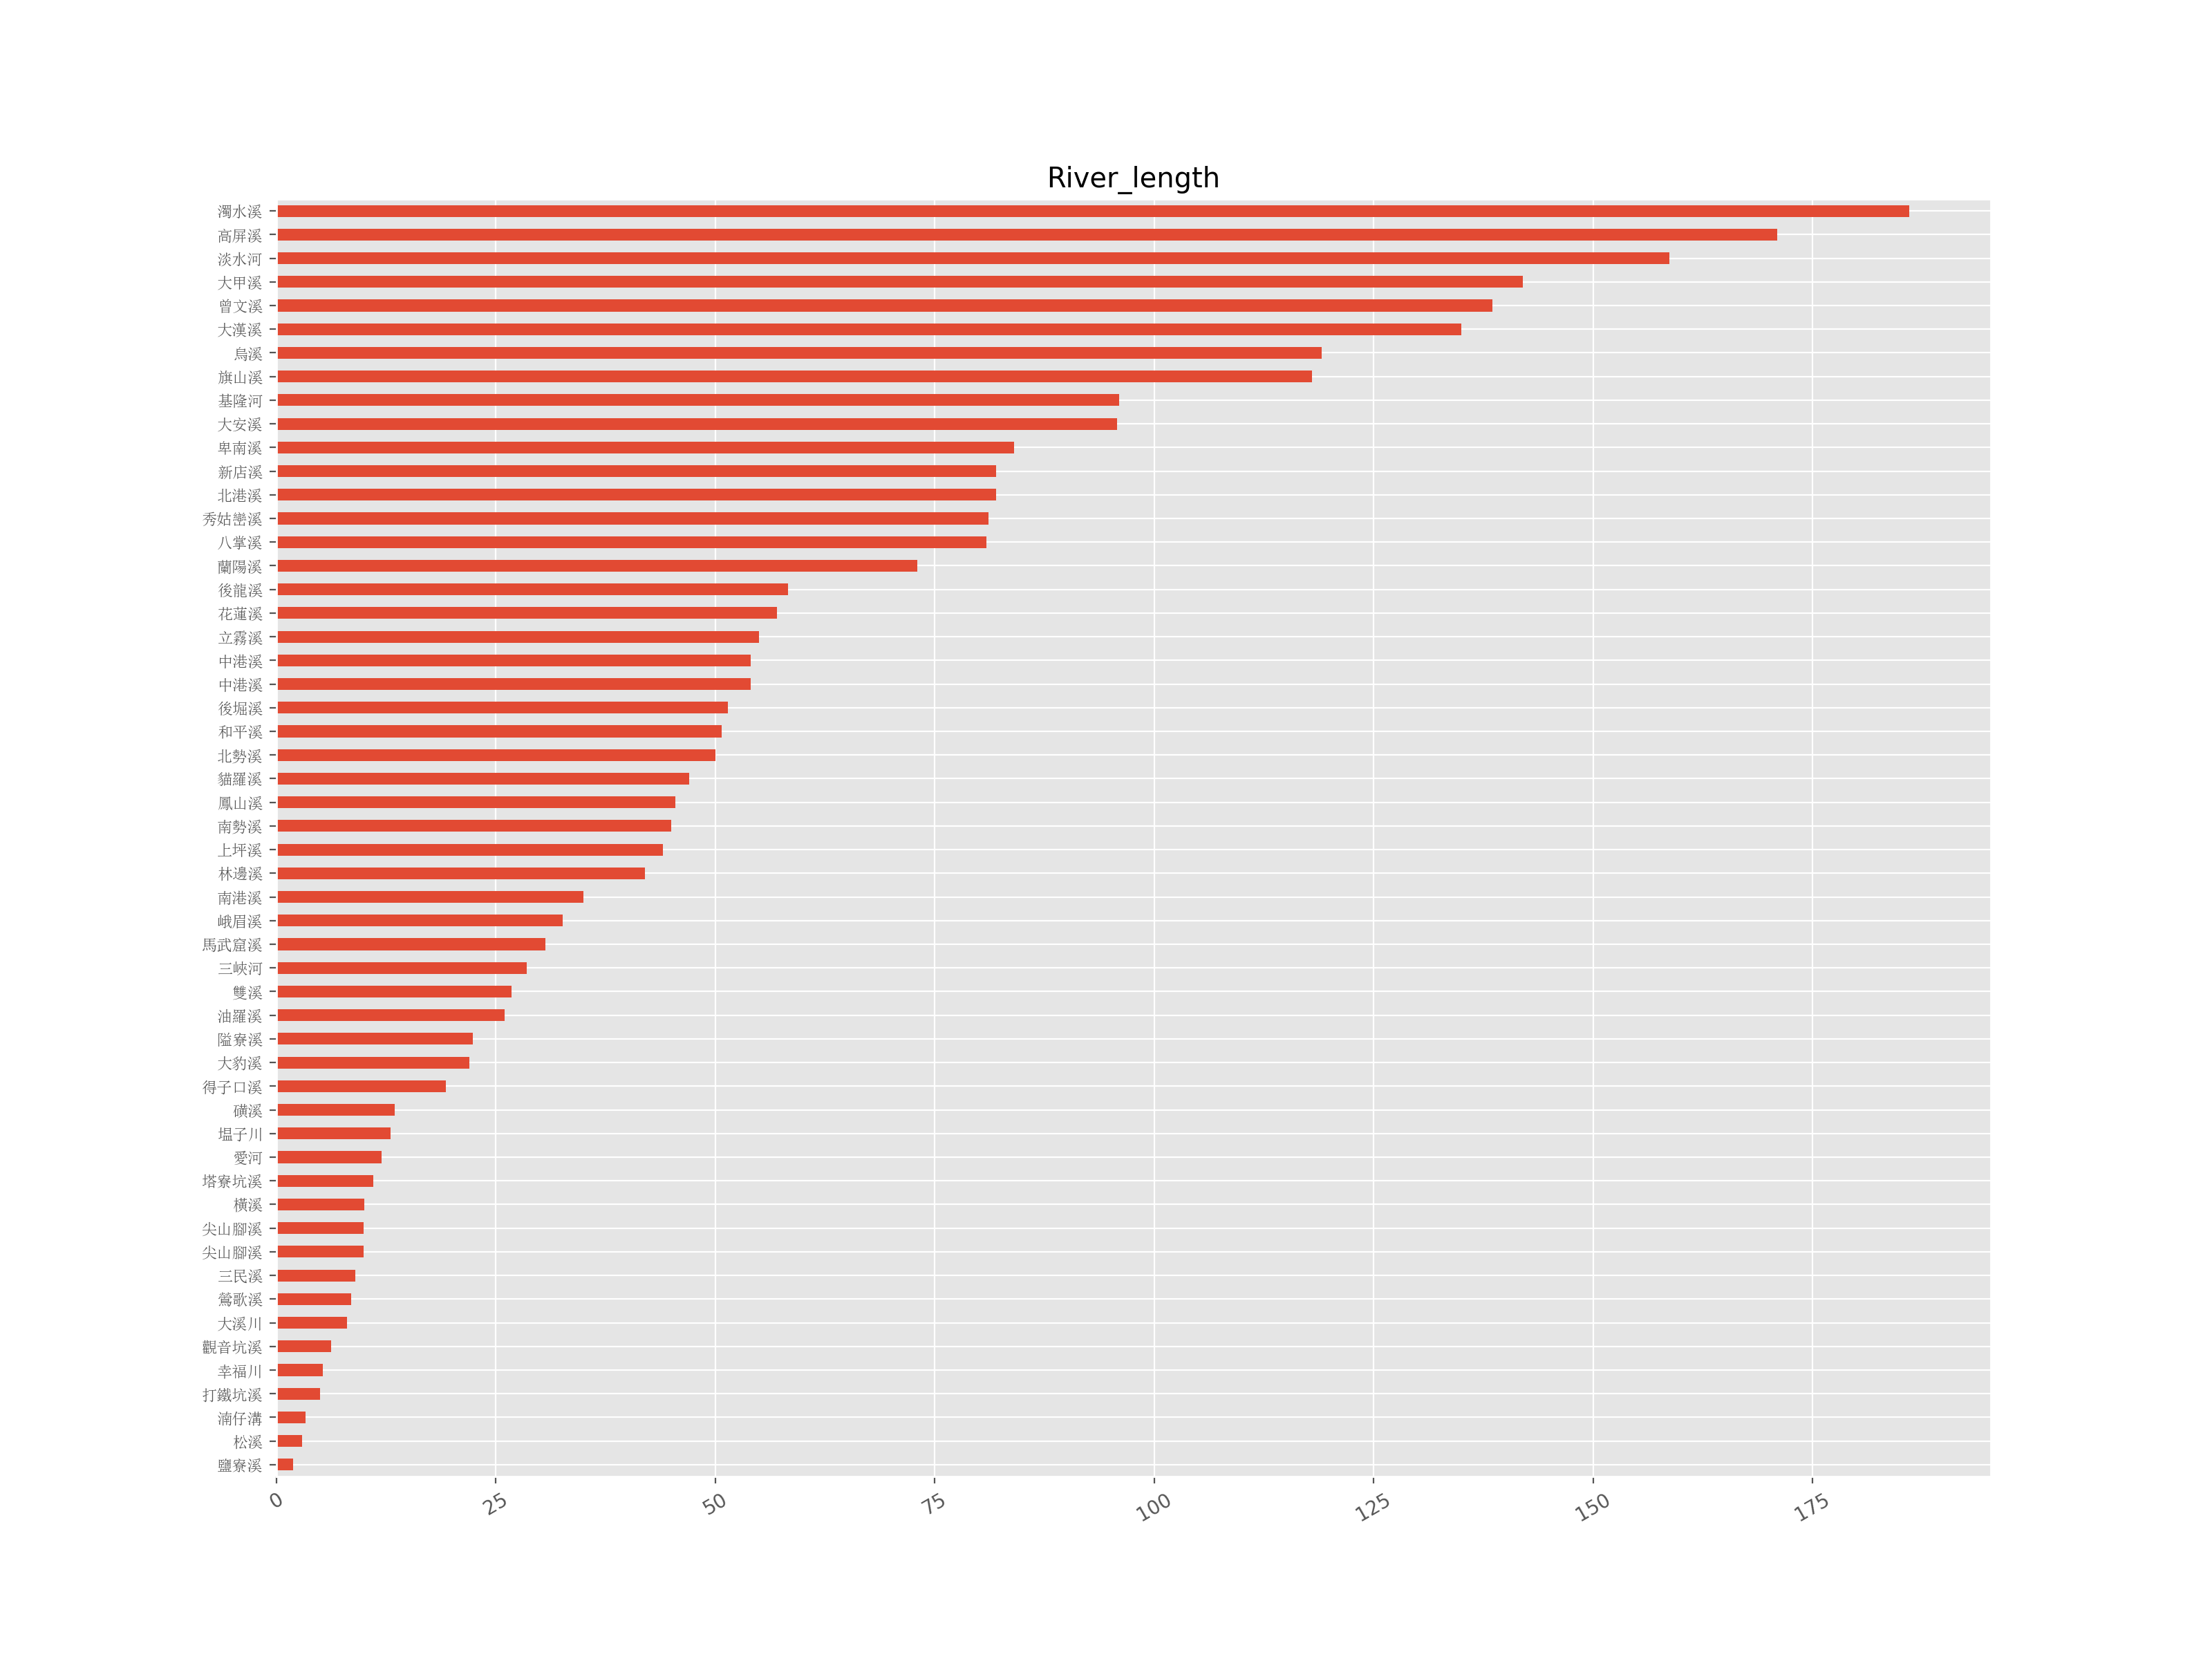

In [3]:
wikidata_get()

In [7]:
#河川代碼: https://data.gov.tw/dataset/22228     
#return {['Id','Name','EName','ToId','GId'],[]} 
def opendata_get(b_print = False):
    title=[['BasinIdentifier','BasinName','EnglishBasinName'],
        ['SubsidiaryBasinIdentifier','SubsidiaryBasinName','EnglishSubsidiaryBasinName'],
        ['SubSubsidiaryBasinIdentifier','SubSubsidiaryBasinName','EnglishSubSubsidiaryBasinName'],
        ['SubSubSubsidiaryBasinIdentifier','SubSubSubsidiaryBasinName','EnglishSubSubSubsidiaryBasinName']]
    #print(title)

    import json
    with open('../include/336F84F7-7CFF-4084-9698-813DD1A916FE.json' , 'r',encoding='utf-8-sig') as json_file:
        data = json.load(json_file)
    #print(data)

    rivers = {} # Id,[name, EName, ToId]
    for item in data['RiverCode_OPENDATA']:
        #print(item)
        #print(item['SubsidiaryBasinName'])
        GId=item['GovernmentUnitIdentifier'].strip() 
        preId="0" # ocean
        for i in range(4):
            if not item[title[i][0]]=="":
                Id=item[title[i][0]].strip()     
                Name=item[title[i][1]].strip()    
                EName=item[title[i][2]].strip() 
                ToId=preId
                
                if not Id in rivers:
                    rivers[Id] = [Name,EName,ToId,GId]
                preId = Id
    if b_print:            
        print("%10s,%20s,%20s,%10s,%10s" % ('Id','Name','EName','ToId','GId'))
        for id in sorted(rivers.keys()):
            print("%10s,%20s,%20s,%10s,%10s" %(id,rivers[id][0],rivers[id][1],rivers[id][2],rivers[id][3]))    
        print("river count=%i" %(len(rivers)))
    return rivers


In [8]:
opendata_get()

{'165000': ['鹽水溪', 'Yanshui River', '0', '6'],
 '165040': ['大洲排水', 'Dazhou Drainage', '165000', '6'],
 '165050': ['柴頭港溪排水', 'Chaitougang River Drainage', '165000', '6'],
 '165060': ['鹽水溪排水', 'Yanshui River Drainage', '165000', '6'],
 '165061': ['曾文溪排水', 'Zengwen River Drainage', '165060', '6'],
 '165062': ['安順寮排水', 'Anshunliao Drainage', '165060', '6'],
 '220000': ['卑南溪', 'Beinan River', '0', '8'],
 '2200J0': ['電光一號溪', 'Dianguang No.1 River', '220000', '8'],
 '2200K0': ['電光二號溪', 'Dianguang No.2 River', '220000', '8'],
 '250000': ['和平溪', 'Heping River', '0', '1'],
 '250010': ['和平北溪', 'Heping North River', '250000', '1'],
 '250020': ['和平南溪', 'Heping South River', '250000', '1'],
 '250030': ['楓溪', 'Feng River', '250000', '1'],
 '251000': ['南澳溪', 'Nanao River', '0', '1'],
 '251010': ['南澳北溪', 'Nanao North River', '251000', '1'],
 '251020': ['南澳南溪', 'Nanao South River', '251000', '1'],
 '252000': ['東澳溪', 'Dongao River', '0', '1'],
 '253000': ['蘇澳溪', 'Suao River', '0', '1'],
 '253010': ['白米溪'

In [15]:
def river_tree(tree_id = "0"):
    rivers = opendata_get()
    if not tree_id == "0" and (not tree_id in rivers):
        print("tree_id not exist!")
        return 
    dot_str="digraph G {\n"
    if tree_id=="0":
        sorted_key = sorted(rivers.keys())
    else: # single river
        child_rivers =[tree_id]
        river_findtree(rivers,child_rivers,tree_id)
        #print(child_rivers)
        sorted_key = sorted(child_rivers)

    for key in sorted_key:
        toid = rivers[key][2]
        if toid =="0":
            gname = "GovID=%s" %(rivers[key][3])
        else:
            gname = "%s_%s" % (toid,rivers[toid][0])
        dot_str += "\t\"%s_%s\" -> \"%s\";\n" %(key,rivers[key][0],gname )

    dot_str += "}"

    print(dot_str)
    
def river_findtree(rivers, child_rivers, river_id = "0"):
    for key in rivers.keys():
        if rivers[key][2]==river_id:
            river_findtree(rivers,child_rivers,key)
            child_rivers.append(key)

In [16]:
river_tree("0")

digraph G {
	"101000_磺溪" -> "GovID=10";
	"102000_小坑溪" -> "GovID=10";
	"103000_乾華溪" -> "GovID=10";
	"104000_石門溪" -> "GovID=8";
	"105000_老梅溪" -> "GovID=10";
	"106000_楓林溪" -> "GovID=7";
	"107000_八甲溪" -> "GovID=10";
	"108000_埔坪溪" -> "GovID=10";
	"109000_八蓮溪" -> "GovID=10";
	"110000_大屯溪" -> "GovID=10";
	"111000_後州溪" -> "GovID=10";
	"112000_興仁溪" -> "GovID=10";
	"113000_林子溪" -> "GovID=10";
	"114000_淡水河" -> "GovID=10";
	"114010_大漢溪" -> "114000_淡水河";
	"114011_三峽溪" -> "114010_大漢溪";
	"114012_鶯歌溪(兔子坑溪排水)" -> "114010_大漢溪";
	"114013_塔寮坑溪" -> "114010_大漢溪";
	"114014_塔克金溪" -> "114010_大漢溪";
	"114015_三光溪" -> "114010_大漢溪";
	"114016_泰崗溪" -> "114010_大漢溪";
	"114017_白石溪" -> "114010_大漢溪";
	"114018_玉峰溪(馬里闊丸溪)" -> "114010_大漢溪";
	"11401B_大豹溪" -> "114011_三峽溪";
	"11401C_二鬮溪" -> "114011_三峽溪";
	"11401D_中埔溪" -> "114011_三峽溪";
	"11401E_竹崙溪" -> "114011_三峽溪";
	"11401F_竹坑溪" -> "114011_三峽溪";
	"11401G_橫溪" -> "114011_三峽溪";
	"114020_新店溪" -> "114000_淡水河";
	"114021_南勢溪" -> "114020_新店溪";
	"114022_北勢溪" -> "114020_新店溪";
	"114023_景美

In [1]:
def opendata_colmap():
    #load
    import pandas as pd 
    #name_filter = ["NAME"]
    df = pd.read_csv("../include/政府開放資料 - 水利署.csv") 
    # Preview the first 5 lines of the loaded data 
    print(df.head())
    
    col_detail = {}
    print("--- %s,%s,%s ---" %("資料集識別碼","資料集名稱","欄位"))
    for index, row in df.iterrows():
        #print(row['資料集識別碼'], row['資料集名稱'], row['主要欄位說明'])
        if row['檔案格式'].find("CSV")>=0:
            col_str = row['主要欄位說明']
            
            cols = col_str.split(";")
            for col in cols:
                #if not col in name_filter:
                print("%s,%s,%s" %(row['資料集識別碼'],row['資料集名稱'],col))
                if col in col_detail:
                    col_detail[col].append(row['資料集名稱'])
                else:
                    col_detail[col] = [row['資料集名稱']]
    print("--- %s,%s ---" %("欄位","有使用資料集名稱"))
    for key in col_detail:
        print("%s,%s"%(key,"|".join(col_detail[key])))    
    

In [2]:
opendata_colmap()

   資料集識別碼               資料集名稱  服務分類          檔案格式  \
0    5981              水利防災資訊  公共資訊           KML   
1    5982           防災資訊_淹水警戒  公共資訊           KML   
2    5983           防災資訊_河川警戒  公共資訊           CSV   
3    5984         防災資訊_水庫洩洪警戒  公共資訊           KML   
4    6439  水利署疏濬資訊(2013年9月以後)  公共資訊  JSON;CSV;XML   

                                              資料下載網址               編碼格式 資料集類型  \
0  https://data.wra.gov.tw/CloudFile/getFile.ashx...              UTF-8   b01   
1  https://data.wra.gov.tw/CloudFile/getFile.ashx...              UTF-8   b01   
2  https://data.wra.gov.tw/CloudFile/getFile.ashx...              UTF-8   b01   
3  https://data.wra.gov.tw/CloudFile/getFile.ashx...              UTF-8   b01   
4  https://data.wra.gov.tw/Service/OpenData.aspx?...  UTF-8;UTF-8;UTF-8   b01   

                                               資料集描述  \
0  水利署整合了氣象、雨量、警戒、災情、崩塌、監控、淹水潛勢、土石流和水文水資源等資訊，提供KM...   
1  經濟部水利署災害緊急應變小組，運用長期防災應變等相關經驗，進一步結合雨量、水位、水庫等即時資...   
2  經濟部水利署災害緊急應變小組，運用長期防災應變

AffiliatedBasin,河川流量測站站況|河川水位測站站況
AffiliatedSubsidiaryBasin,河川流量測站站況|河川水位測站站況|水利署所屬雨量站基本資料
AffiliatedSubSubsidiaryBasin,河川流量測站站況|河川水位測站站況|水利署所屬雨量站基本資料
AlertLevel1,河川流量測站站況|河川水位測站站況|警戒水位值
AlertLevel2,河川流量測站站況|河川水位測站站況|警戒水位值
AlertLevel3,河川流量測站站況|河川水位測站站況|警戒水位值
BasinIdentifier,河川流量測站站況|河川水位測站站況|河川代碼|水利署所屬雨量站基本資料|水利署水利防災用影像
BrittlenessStatus,河川流量測站站況|河川水位測站站況
CarDriveDistanceInHours,河川流量測站站況|河川水位測站站況
CityElectricitySupplyStatus,河川流量測站站況|河川水位測站站況
ConstructionManagement,河川流量測站站況|河川水位測站站況
CrossRiverStructuresNameOfEquipment,河川流量測站站況|河川水位測站站況
DataCollectionFrequecy,河川流量測站站況|河川水位測站站況
DataSubmitted,河川流量測站站況|河川水位測站站況
DrainageArea,河川流量測站站況
DrainageStatus,河川流量測站站況|河川水位測站站況
EcologicalEnvironmentMonitoring,河川流量測站站況|河川水位測站站況
ElevationOfWaterLevelZeroPoint,河川流量測站站況|河川水位測站站況
EnglishAddress,河川流量測站站況|河川水位測站站況|水利署所屬雨量站基本資料
EnglishgRiverName,河川流量測站站況
EnglishName,河川流量測站站況|水利署委辦計畫基本資料|水利署研究計畫報告書基本資料|河川水位測站站況
EquipmentStatus,河川流量測站站況|河川水位測站站況
EquipmentStatusOnCrossRiverStructures,河川流量測站站況|河川水位測站站況
FloodPrevent